In [40]:
import requests
import json
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Environment variables
datasets_dir = os.environ.get('DATA_DIR_LOCAL')
DATA_FOLDER = os.path.join(datasets_dir, "RPG/PaysBasque")
source_data = gpd.read_file(os.path.join(DATA_FOLDER, "contour-du-pays-basque.geojson"))

In [ ]:
bbox = list(source_data.geometry.values[0].bounds)
bbox

[-1.792350952083531, 42.95072315985167, -0.745872490046169, 43.547254988966124]

In [24]:
url = 'https://earth-search.aws.element84.com/v1/search'
data={"bbox": bbox,
     "datetime": "2019-08-01T00:00:00Z/2019-08-31T12:31:12Z",
     "collections":["sentinel-2-l2a"]}
response = requests.post(
    url,
    data=json.dumps(data)
).json()
response

{'type': 'FeatureCollection',
 'stac_version': '1.0.0',
 'stac_extensions': [],
 'context': {'limit': 10, 'matched': 91429228, 'returned': 10},
 'numberMatched': 91429228,
 'numberReturned': 10,
 'features': [{'type': 'Feature',
   'stac_version': '1.0.0',
   'id': 'S2B_T31UCB_20240606T105621_L2A',
   'properties': {'created': '2024-06-06T13:55:50.493Z',
    'platform': 'sentinel-2b',
    'constellation': 'sentinel-2',
    'instruments': ['msi'],
    'eo:cloud_cover': 13.337554,
    'proj:epsg': 32631,
    'proj:centroid': {'lat': 55.32483, 'lon': 1.37815},
    'mgrs:utm_zone': 31,
    'mgrs:latitude_band': 'U',
    'mgrs:grid_square': 'CB',
    'grid:code': 'MGRS-31UCB',
    'view:azimuth': 109.99709083268577,
    'view:incidence_angle': 10.793682227065139,
    'view:sun_azimuth': 159.046669223353,
    'view:sun_elevation': 55.9976756919072,
    's2:tile_id': 'S2B_OPER_MSI_L2A_TL_2BPS_20240606T122605_A037872_T31UCB_N05.10',
    's2:degraded_msi_data_percentage': 0,
    's2:nodata_pixe

In [29]:
len(response['features'])

10

In [32]:
response['features'][0]['assets'].keys()

dict_keys(['red', 'green', 'blue', 'visual', 'nir', 'swir22', 'rededge2', 'rededge3', 'rededge1', 'swir16', 'wvp', 'nir08', 'scl', 'aot', 'coastal', 'nir09', 'cloud', 'snow', 'preview', 'granule_metadata', 'tileinfo_metadata', 'product_metadata', 'thumbnail'])

In [36]:
img = rasterio.open(response['features'][0]['assets']['visual']['href']).read()

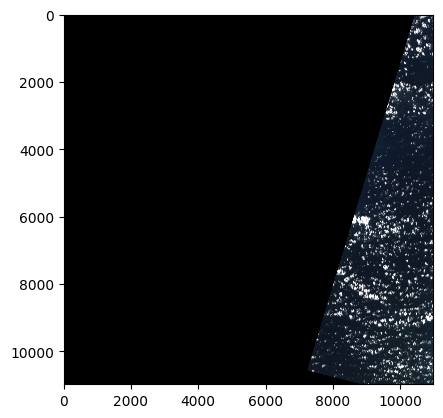

In [41]:
plt.imshow(np.moveaxis(img, 0, 2));

In [42]:
response['features'][0]

{'type': 'Feature',
 'stac_version': '1.0.0',
 'id': 'S2B_T31UCB_20240606T105621_L2A',
 'properties': {'created': '2024-06-06T13:55:50.493Z',
  'platform': 'sentinel-2b',
  'constellation': 'sentinel-2',
  'instruments': ['msi'],
  'eo:cloud_cover': 13.337554,
  'proj:epsg': 32631,
  'proj:centroid': {'lat': 55.32483, 'lon': 1.37815},
  'mgrs:utm_zone': 31,
  'mgrs:latitude_band': 'U',
  'mgrs:grid_square': 'CB',
  'grid:code': 'MGRS-31UCB',
  'view:azimuth': 109.99709083268577,
  'view:incidence_angle': 10.793682227065139,
  'view:sun_azimuth': 159.046669223353,
  'view:sun_elevation': 55.9976756919072,
  's2:tile_id': 'S2B_OPER_MSI_L2A_TL_2BPS_20240606T122605_A037872_T31UCB_N05.10',
  's2:degraded_msi_data_percentage': 0,
  's2:nodata_pixel_percentage': 80.041897,
  's2:saturated_defective_pixel_percentage': 0,
  's2:dark_features_percentage': 0,
  's2:cloud_shadow_percentage': 0,
  's2:vegetation_percentage': 0.003375,
  's2:not_vegetated_percentage': 0.000366,
  's2:water_percentag